In [1]:
'''
CS677 - Final Project - Predicting the SPY 
SPY Prediction using LSTM 
Author - Amruta Abhyankar
'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use("fivethirtyeight")
import seaborn as sns
import numpy as np
import os
import pandas as pd
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [2]:
input_data = pd.read_csv('/Users/amrabh/Downloads/SPY.csv', index_col = 'Date')

In [3]:
input_data.shape

(7014, 6)

In [4]:
input_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-02-01,43.96875,44.25000,43.96875,44.25000,26.265144,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,26.320782,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.599014,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.710312,531500
1993-02-05,44.96875,45.06250,44.71875,44.96875,26.691771,492100


In [5]:
input_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-30,362.829987,363.119995,359.170013,362.059998,362.059998,83872700
2020-12-01,365.570007,367.679993,364.929993,366.019989,366.019989,74505000
2020-12-02,364.820007,366.959991,364.200012,366.790009,366.790009,45927000
2020-12-03,366.679993,368.190002,365.500000,366.690002,366.690002,62882000
2020-12-04,367.320007,369.850006,367.220001,369.850006,369.850006,50676700


In [6]:
input_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7014.000000,7014.000000,7014.000000,7014.000000,7014.000000,7.014000e+03
mean,143.087253,143.938409,142.139512,143.084707,118.303839,8.465483e+07
std,70.418804,70.724677,70.075717,70.421214,75.788055,9.680286e+07
min,43.343750,43.531250,42.812500,43.406250,25.764320,5.200000e+03
25%,99.606248,100.571875,98.562498,99.621252,71.193678,7.760725e+06
50%,127.110001,127.805001,126.174999,127.019997,93.862629,5.828205e+07
75%,179.880001,180.494999,178.990002,179.870003,157.017071,1.212786e+08
max,367.320007,369.850006,367.220001,369.850006,369.850006,8.710263e+08


In [7]:
print('There are {} number of days in the dataset.'.format(input_data.shape[0]))

There are 7014 number of days in the dataset.


In [8]:
input_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7014 entries, 1993-02-01 to 2020-12-04
Data columns (total 6 columns):
Open         7014 non-null float64
High         7014 non-null float64
Low          7014 non-null float64
Close        7014 non-null float64
Adj Close    7014 non-null float64
Volume       7014 non-null int64
dtypes: float64(5), int64(1)
memory usage: 383.6+ KB


In [10]:
input_data = input_data.dropna()

In [11]:
input_data.shape

(7014, 6)

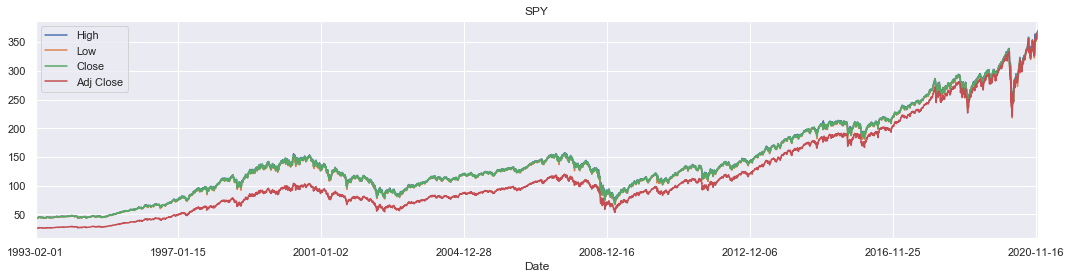

In [12]:
input_data.iloc[:,1:5].plot(figsize=(16,4), legend=True)
plt.title("SPY")
plt.show()

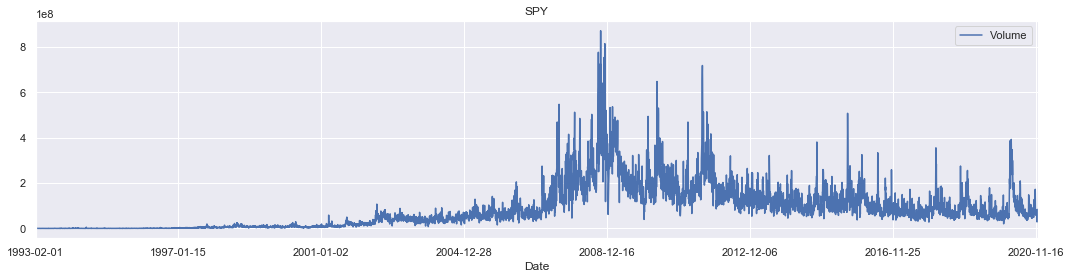

In [13]:
input_data.iloc[:, -1].plot(figsize=(16,4), legend=True)
plt.title("SPY")
plt.show()

In [14]:
# We drop the Adj Close and Volume Columns

In [15]:
data = input_data.iloc[:, 1:5]

In [16]:
data.shape

(7014, 4)

In [17]:
# Data Normalization using minmaxscaler normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [18]:
scaled_data

array([[0.0022026 , 0.00356419, 0.00258467, 0.00145552],
       [0.00258566, 0.00404584, 0.00287186, 0.00161722],
       [0.00402214, 0.00481647, 0.00430779, 0.00242583],
       ...,
       [0.99114358, 0.99069075, 0.99062627, 0.99110688],
       [0.99491294, 0.99469802, 0.99031991, 0.99081623],
       [1.        , 1.        , 1.        , 1.        ]])

In [19]:
#get the number of rows to train
train_len = math.ceil(len(scaled_data)*.8) #math.ceil to round up
print("The length of training data is : ",(train_len) , "rows")

The length of training data is :  5612 rows


In [20]:
# 60 time stamps
x_train = []
y_train = []

for i in range(60,train_len):
    x_train.append(scaled_data[i-60:i, 0:5])
    y_train.append(scaled_data[i,0:5])

x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(5552, 60, 4)

In [22]:
y_train.shape

(5552, 4)

In [23]:
y_train[0]

array([0.00114918, 0.00279355, 0.00114874, 0.00100357])

In [24]:
inputshape = (x_train.shape[1],4)
inputshape

(60, 4)

In [25]:
model = Sequential()
model.add(GRU(256 , input_shape=(x_train.shape[1],4) , return_sequences=True))
model.add(Dropout(0.4))
model.add(Dense(64))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64,  activation = 'relu'))
model.add(Dense(4))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 256)           201216    
_________________________________________________________________
dropout (Dropout)            (None, 60, 256)           0         
_________________________________________________________________
dense (Dense)                (None, 60, 64)            16448     
_________________________________________________________________
lstm (LSTM)                  (None, 256)               328704    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2

In [26]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [27]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
174/174 [==============================] - 47s 272ms/step - loss: 0.0016
Epoch 2/10
174/174 [==============================] - 58s 336ms/step - loss: 3.3148e-04
Epoch 3/10
174/174 [==============================] - 62s 354ms/step - loss: 2.4333e-04
Epoch 4/10
174/174 [==============================] - 55s 319ms/step - loss: 1.9609e-04
Epoch 5/10
174/174 [==============================] - 62s 358ms/step - loss: 1.5894e-04
Epoch 6/10
174/174 [==============================] - 65s 376ms/step - loss: 1.4214e-04
Epoch 7/10
174/174 [==============================] - 59s 337ms/step - loss: 1.4361e-04
Epoch 8/10
174/174 [==============================] - 61s 349ms/step - loss: 1.3049e-04
Epoch 9/10
174/174 [==============================] - 60s 347ms/step - loss: 1.2414e-04
Epoch 10/10
174/174 [==============================] - 57s 327ms/step - loss: 1.1488e-04


In [28]:
scaled_data

array([[0.0022026 , 0.00356419, 0.00258467, 0.00145552],
       [0.00258566, 0.00404584, 0.00287186, 0.00161722],
       [0.00402214, 0.00481647, 0.00430779, 0.00242583],
       ...,
       [0.99114358, 0.99069075, 0.99062627, 0.99110688],
       [0.99491294, 0.99469802, 0.99031991, 0.99081623],
       [1.        , 1.        , 1.        , 1.        ]])

In [29]:
df = pd.DataFrame(scaled_data)
df.shape

(7014, 4)

In [30]:
dataset_total = pd.concat((df, df), axis=0)
print(dataset_total.shape)


(14028, 4)


In [31]:
test_data = scaled_data[train_len:]
test_data.shape

(1402, 4)

In [32]:
inputs = dataset_total[len(dataset_total)-len(test_data)-60: ].values
print(inputs.shape)

(1462, 4)


In [33]:
#preparing x_test
# 60 time stamps
x_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i, 0:5])
x_test = np.array(x_test)

In [34]:
x_test.shape

(1402, 60, 4)

In [35]:
# predicting the spy prices for test set
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)

In [36]:
test_org = scaler.inverse_transform(test_data)

In [37]:
# function which plots the predictions 
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("spy price prediction")
    plt.xlabel("time")
    plt.ylabel("spy price")
    plt.legend()
    plt.show()

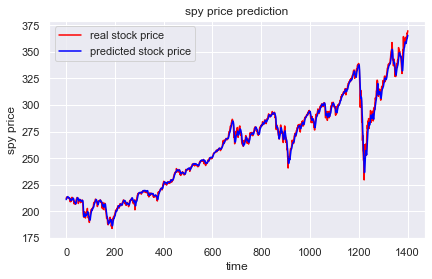

In [38]:
# visualizing the results: predicted vs test

plot_predictions(test_org[:,0], predicted[:,0])

In [39]:
predicted.shape


(1402, 4)

In [40]:
test_data.shape

(1402, 4)

In [41]:
accuracy = predicted/test_org
test_set_accuracy = accuracy.mean()
test_set_accuracy

1.0027596590275432

In [42]:
print("Average accuracy of the test set is :", test_set_accuracy)

Average accuracy of the test set is : 1.0027596590275432


In [43]:
predict_data = pd.read_csv('/Users/amrabh/Downloads/SPY.csv', index_col = 'Date')

In [44]:
pred_inp = predict_data[-60:]

In [45]:
pred_inp  = pred_inp.iloc[:, 0:4]

In [46]:
scaled_input  = scaler.transform(pred_inp)

In [47]:
scaled_input = scaled_input.reshape(1,60,4)

In [48]:
pred = model.predict(scaled_input)

In [49]:
pred

array([[0.99012727, 0.9997799 , 0.9992466 , 0.9822634 ]], dtype=float32)

In [50]:
pred = scaler.inverse_transform(pred)

In [51]:
from datetime import date
import datetime
today = date.today()

In [52]:
print("*****Predicted Values********")
print(today)
print("Predict Open  :" ,pred[0][0])
print("Predict High  :" ,pred[0][1])
print("Predict Low   :" ,pred[0][2])
print("Predict Close :" ,pred[0][3])


*****Predicted Values********
2020-12-06
Predict Open  : 366.62833
Predict High  : 367.14862
Predict Low   : 369.60406
Predict Close : 363.7471


In [53]:
actual_values = np.array([367.320007,369.850006,367.220001,369.850006])

In [54]:
accuracy_open = pred[0][0]/actual_values[0]
print("Accuracy of predicted Open is :", accuracy_open)

Accuracy of predicted Open is : 0.9981169536894179


In [55]:
accuracy_high = pred[0][1]/actual_values[1]
print("Accuracy of predicted High is :",accuracy_high)

Accuracy of predicted High is : 0.9926959974294789


In [56]:
accuracy_low = pred[0][2]/actual_values[2]
print("Accuracy of predicted Low is :",accuracy_low)

Accuracy of predicted Low is : 1.0064921952369534


In [57]:
accuracy_close= pred[0][3]/actual_values[3]
print("Accuracy of predicted Close is :",accuracy_close)

Accuracy of predicted Close is : 0.9834989723647


In [58]:
error_open = 1-accuracy_open
print("Error of predicted Open is :", error_open)

Error of predicted Open is : 0.001883046310582115


In [59]:
error_high = 1-accuracy_high
print("Error of predicted High is :", error_high)

Error of predicted High is : 0.0073040025705211065


In [60]:
error_low = 1-accuracy_low
print("Error of predicted Low is :", error_low)

Error of predicted Low is : -0.006492195236953435


In [61]:
error_close = 1-accuracy_close
print("Error of predicted Close is :", error_close)

Error of predicted Close is : 0.016501027635300036
